# Drawing Conclusions
Use the space below to address questions on datasets `clean_08.csv` and `clean_18.csv`. You should've created these data files in the previous section: *Fixing Data Types Pt 3*.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# load datasets

df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')
df_08.tail()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
982,VOLVO XC 90,3.2,6,Auto-S6,2WD,Gasoline,SUV,7.0,14.0,20.0,16.0,4,no
983,VOLVO XC 90,3.2,6,Auto-S6,4WD,Gasoline,SUV,7.0,14.0,20.0,16.0,4,no
984,VOLVO XC 90,4.4,8,Auto-S6,4WD,Gasoline,SUV,7.0,13.0,19.0,15.0,3,no
985,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6.0,13.0,19.0,15.0,7,no
986,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4.0,18.0,25.0,21.0,6,no


### Q1: Are more unique models using alternative sources of fuel? By how much?

In [33]:
df_08.model.nunique()

377

In [12]:
df_18.model.nunique()

357

In [34]:
df_08.fuel.value_counts()

Gasoline    984
ethanol       1
gas           1
CNG           1
Name: fuel, dtype: int64

In [35]:
df_18.fuel.value_counts()

Gasoline       749
Gas             26
Ethanol         26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

In [27]:
alt_08=df_08.query("fuel in ['ethanol','CNG'] ").model.nunique()

In [28]:
alt_18=df_18.query("fuel in ['Ethanol','Electricity'] ").model.nunique()

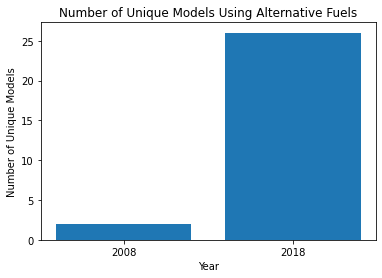

In [29]:
plt.bar(["2008","2018"],[alt_08 , alt_18])
plt.title("Number of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Number of Unique Models");

### Q2: How much have vehicle classes improved in fuel economy?  

In [23]:
mpg_08=df_08.groupby('veh_class').mean()['cmb_mpg']
mpg_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [24]:
mpg_18=df_18.groupby('veh_class').mean()['cmb_mpg']
mpg_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [25]:
inc= mpg_18-mpg_08
inc.dropna(inplace=True)
inc

veh_class
large car        4.900000
midsize car      6.282609
minivan          1.682353
pickup           2.312635
small car        4.315948
station wagon    5.162745
Name: cmb_mpg, dtype: float64

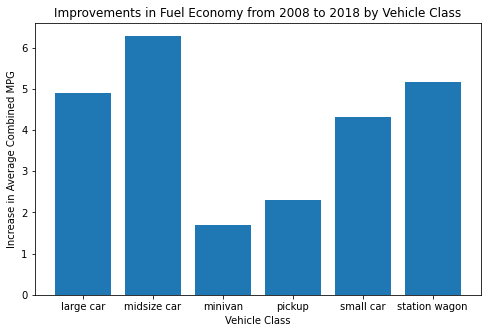

In [26]:
plt.subplots(figsize=(8, 5))
plt.bar(inc.index,inc);
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

In [3]:
smrt_08=df_08.query('smartway in ["yes" , "Elite"]').describe().loc['mean','cmb_mpg':]
# smrt.groupby('smartway')
smrt_08

cmb_mpg                 23.736842
greenhouse_gas_score     6.868421
Name: mean, dtype: float64

In [4]:
smrt_18=df_18.query('smartway in ["yes" , "Elite"]').describe().loc['mean','cmb_mpg':]
# smrt.groupby('smartway')
smrt_18

cmb_mpg                 53.0
greenhouse_gas_score    10.0
Name: mean, dtype: float64

In [7]:
imp=smrt_18-smrt_08
imp

cmb_mpg                 29.263158
greenhouse_gas_score     3.131579
Name: mean, dtype: float64

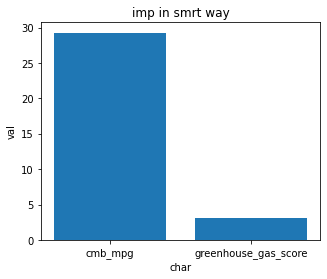

In [22]:
plt.subplots(figsize=(5, 4))
plt.bar(imp.index,imp);
plt.title('imp in smrt way');
plt.xlabel('char')
plt.ylabel('val');

### Q4: What features are associated with better fuel economy?

In [35]:
top_08=df_08.query('cmb_mpg > cmb_mpg.mean()').describe().loc['mean']

In [34]:
top_18=df_18.query('cmb_mpg > cmb_mpg.mean()').describe().loc['mean']

<BarContainer object of 7 artists>

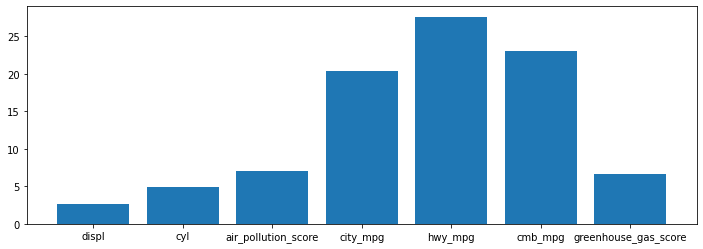

In [45]:
plt.subplots(figsize=(12,4));
plt.bar(top_08.index,top_08)


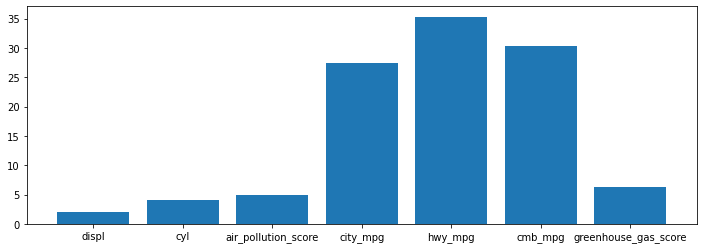

In [47]:
plt.subplots(figsize=(12,4));
plt.bar(top_18.index,top_18);
